In this notebook, we will try to focus in the Colombian dynamic to be able to determine the virus mobility as well as it's R factor depending on different local factors. The use of this notebook is diagnosis on the effectivness of certain measures on the R factor as well as. 

In [1]:
#Los clasicos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # para leer datos
import sklearn.manifold
import glob
import random
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import f1_score
#Ejercicio 16
import sklearn.metrics
import sklearn.tree
#Ejercicio 24
from sklearn.linear_model import LogisticRegression
import sklearn.neural_network
#Ejercicio 20, clusters umap
import sklearn.cluster
#Ejercicio 17
import sklearn.ensemble # para el random forest

#Puede ser interesante el ejercicio 8 para fitear usando bayes, 7 con MCMH .


One of the biggest problems is to organize our data. The Uncover library has a TON of data. Let's try to make out some cateogries. 

In [2]:
folderset = [folder for folder in glob.glob("Uncover/" + "**/", recursive=True)]
mobility = [folderset[10], folderset[13], folderset[2]]
ressources = [folderset[1]]
healthcareData = [folderset[7],folderset[11]]
covidData = [folderset[3],folderset[4],folderset[5],folderset[6],folderset[8],folderset[9],folderset[12]]
OtherFacilities = [folderset[14]]

csv_Mobility = []
csv_ressources = []
csv_health = []
csv_covid = []
csv_otherFacilities = []

In [3]:
#Mobility
print("\n Mobility \n")
num_carpetas = len(mobility)
for i in range(num_carpetas):
    folder_here = mobility[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_Mobility.append(name)
#ressources
print("\n Ressources \n")
num_carpetas = len(ressources)
for i in range(num_carpetas):
    folder_here = ressources[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_ressources.append(name)
#Healthcare
print("\n Healthcare Data \n")
num_carpetas = len(healthcareData)
for i in range(num_carpetas):
    folder_here = healthcareData[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_health.append(name)
#Covid 
print("\n Covid \n")
num_carpetas = len(covidData)
for i in range(num_carpetas):
    folder_here = covidData[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_covid.append(name)
#OtherFacilities
print("\n OtherFacilities \n")
num_carpetas = len(OtherFacilities)
for i in range(num_carpetas):
    folder_here = OtherFacilities[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_otherFacilities.append(name)
                
#We realize that the the school file should be in OtherFacilities

csv_otherFacilities.append(csv_covid.pop(3))

print(csv_otherFacilities)


 Mobility 

Uncover/geotab/border-wait-times-at-us-canada-border.csv
Uncover/geotab/airport-traffic-analysis.csv
Uncover/google_mobility/regional-mobility.csv
Uncover/google_mobility/us-mobility.csv
Uncover/un_world_food_programme/world-travel-restrictions.csv

 Ressources 

Uncover/hifld/us-ports-of-entry.csv
Uncover/hifld/nursing-homes.csv
Uncover/hifld/hospitals.csv
Uncover/hifld/local-emergency-operations-centers-eoc.csv
Uncover/hifld/public-health-departments.csv
Uncover/hifld/urgent-care-facilities.csv
Uncover/hifld/aircraft-landing-facilities.csv

 Healthcare Data 

Uncover/oecd/health-care-utilization.csv
Uncover/oecd/influenza-vaccination-rates.csv
Uncover/us_cdc/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system.csv
Uncover/us_cdc/500-cities-census-tract-level-data-gis-friendly-format-2019-release.csv
Uncover/us_cdc/global-tobacco-surveillance-system-gtss-global-youth-tobacco-survey-gyts.csv
Uncover/us_cdc/global-tobacco-surveillance-system-gt

Now it is possible to attack one problem at the time. Let's start by finding and visualization the Colombian Data. 

(9, 350) (9, 350) (9, 350)


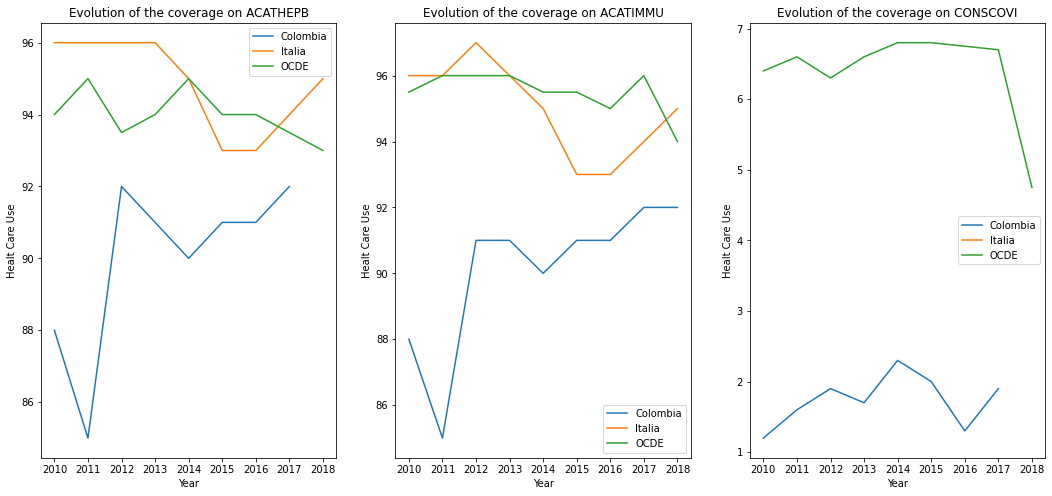

In [5]:
#HealthCare Utilization
WorldHC = pd.read_csv(csv_health[0])
colombianHC = WorldHC[WorldHC['country'] == 'Colombia']
italianHC = WorldHC[WorldHC['country'] == 'Italy']
variables=WorldHC['var'].unique()
Mundo = pd.DataFrame(columns= variables)
Colombia = pd.DataFrame(columns= variables)
Italia = pd.DataFrame(columns= variables)
#WorldAveg, Colombian and Italian
for i in range(9):
    anio = 2010+i
    year = WorldHC[WorldHC['year'] == anio]
    by_var = year.groupby('var')
    new_row = pd.Series(data=by_var.median()['value'], name=anio)
    Mundo = Mundo.append(new_row)
    
    yearC = colombianHC[colombianHC['year'] == anio]
    by_varC = yearC.groupby('var')
    new_rowC = pd.Series(data=by_varC.median()['value'], name=anio)
    Colombia = Colombia.append(new_rowC)
    
    yearI = italianHC[italianHC['year'] == anio]
    by_varI = yearI.groupby('var')
    new_rowI = pd.Series(data=by_varI.median()['value'], name=anio)
    Italia = Italia.append(new_rowI)
print(np.shape(Mundo),np.shape(Colombia),np.shape(Italia))

plt.figure(figsize=(18, 8))
anios = list(Mundo.index) 
for i in range(3):
    graficaremos =['ACATHEPB', 'ACATIMMU', 'CONSCOVI']
    plt.subplot(1,3,i+1)
    plt.plot(anios,Colombia[graficaremos[i]], label='Colombia')
    plt.plot(anios,Italia[graficaremos[i]], label='Italia')
    plt.plot(anios,Mundo[graficaremos[i]], label='OCDE')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Healt Care Use')
    plt.title('Evolution of the coverage on {}'.format(graficaremos[i]))

(63, 6) (63, 6)


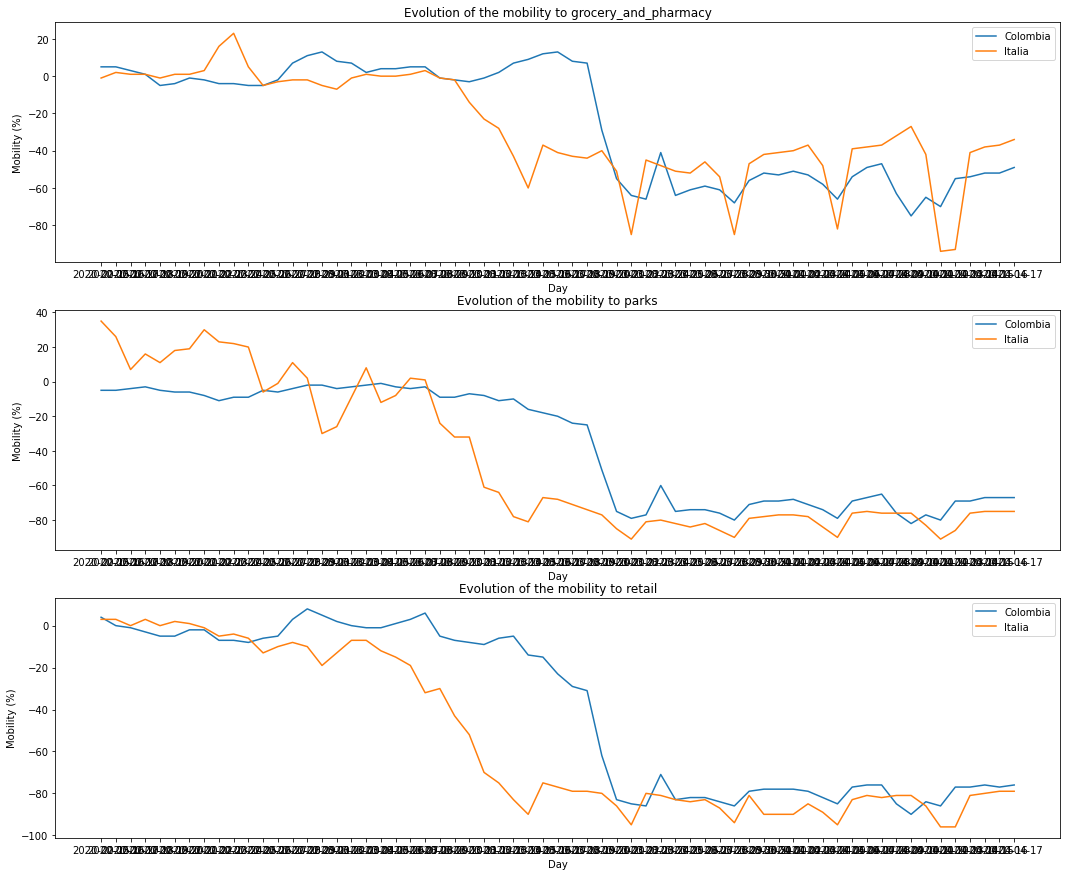

In [6]:
#Mobility
WorldM = pd.read_csv(csv_Mobility[2])
movs = list(WorldM.keys())[3::]
colombianM = WorldM[WorldM['country'] == 'Colombia']
colombianM = colombianM[colombianM['region'] == 'Total']
italianM = WorldM[WorldM['country'] == 'Italy']
italianM = italianM[italianM['region'] == 'Total']
colombianM = colombianM.set_index("date", drop = False)
italianM = italianM.set_index("date", drop = False)
colombianM = colombianM[movs]
italianM = italianM[movs]
print(np.shape(colombianM),np.shape(italianM))

plt.figure(figsize=(18, 15))
Fechas = list(colombianM.index) 
for i in range(3):
    graficaremos = random.choice(movs)
    plt.subplot(3,1,i+1)
    plt.plot(Fechas,colombianM[graficaremos], label='Colombia')
    plt.plot(Fechas,italianM[graficaremos], label='Italia')
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Mobility (%)')
    plt.title('Evolution of the mobility to {}'.format(graficaremos))

We don't have so much data, but it is enough to try. We shall try to evaluate two types of results. One will be the number of contamination by test taken, the other will be the date rate. Colombia should be more thorough in the colected data. <br>
For this part we have to understand that we are handeling a lot of datasets that report the same. We need to have a data sets on the tests made, on the cases reported and the deaths. 

In [ ]:
Uncover/worldometer/worldometer-confirmed-cases-and-deaths-by-country-territory-or-conveyance.csv
Uncover/HDE/total-covid-19-tests-performed-by-country.csv
Uncover/HDE/acaps-covid-19-government-measures-dataset.csv

Uncover/world_bank/total-covid-19-tests-performed-by-country.csv
Uncover/ECDC/current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv
Uncover/WHO/world-health-organization-who-situation-reports.csv
Uncover/our_world_in_data/covid-19-testing-latest-data-and-source-details.csv
Uncover/our_world_in_data/coronavirus-disease-covid-19-statistics-and-research.csv

Uncover/world_in_data/covid-19-testing-all-observations.csv
